## LinkedIn Job Data Analysis

In [1]:
# importing libraries for analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading dataset
df = pd.read_csv("linkdin_Job_data.csv")
df.head(3)

,job_ID,job,location,company_id,company_name,work_type,full_time_remote,no_of_employ,no_of_application,posted_day_ago,alumni,Hiring_person,linkedin_followers,hiring_person_link,job_details,Column1
0,3471657636,"Data Analyst, Trilogy (Remote) - $60,000/year USD","Delhi, Delhi, India",NaN,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",200,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...,NaN
1,3471669068,"Data Analyst, Trilogy (Remote) - $60,000/year USD","New Delhi, Delhi, India",NaN,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",184,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...,NaN
2,3474349934,Data Analyst - WFH,Greater Bengaluru Area,NaN,Uplers,Remote,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",200,9 hours,3 company alumni,Shahid Ahmad,NaN,https://www.linkedin.com/in/shahid-ahmad-a2613...,About the job Profile: ML EngineersExperience:...,NaN


## Understanding the Data

In [3]:
#listinfg allcolmns in the dataset
list(df.columns)

['job_ID',
 'job',
 'location',
 'company_id',
 'company_name',
 'work_type',
 'full_time_remote',
 'no_of_employ',
 'no_of_application',
 'posted_day_ago',
 'alumni',
 'Hiring_person',
 'linkedin_followers',
 'hiring_person_link',
 'job_details',
 'Column1']

In [4]:
#finding the shape of he dataset
df.shape

(7927, 16)

In [5]:
#checking for details about each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7927 entries, 0 to 7926
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   job_ID              7927 non-null   int64  
 1   job                 7894 non-null   object 
 2   location            7894 non-null   object 
 3   company_id          0 non-null      float64
 4   company_name        7892 non-null   object 
 5   work_type           7736 non-null   object 
 6   full_time_remote    7848 non-null   object 
 7   no_of_employ        7603 non-null   object 
 8   no_of_application   7887 non-null   object 
 9   posted_day_ago      7920 non-null   object 
 10  alumni              4858 non-null   object 
 11  Hiring_person       5720 non-null   object 
 12  linkedin_followers  4814 non-null   object 
 13  hiring_person_link  5720 non-null   object 
 14  job_details         7881 non-null   object 
 15  Column1             0 non-null      float64
dtypes: flo

In [6]:
# Checking for mixed datatypes in all columns

for col in df.columns:
    unique_types = df[col].apply(type).unique()
    if len(unique_types) > 1:
        print(col, unique_types)

job [<class 'str'> <class 'float'>]
location [<class 'str'> <class 'float'>]
company_name [<class 'str'> <class 'float'>]
work_type [<class 'str'> <class 'float'>]
full_time_remote [<class 'str'> <class 'float'>]
no_of_employ [<class 'str'> <class 'float'>]
no_of_application [<class 'str'> <class 'float'>]
posted_day_ago [<class 'str'> <class 'float'>]
alumni [<class 'str'> <class 'float'>]
Hiring_person [<class 'float'> <class 'str'>]
linkedin_followers [<class 'str'> <class 'float'>]
hiring_person_link [<class 'float'> <class 'str'>]
job_details [<class 'str'> <class 'float'>]


In [7]:
# checking for null values
df.isnull().sum()

job_ID                   0
job                     33
location                33
company_id            7927
company_name            35
work_type              191
full_time_remote        79
no_of_employ           324
no_of_application       40
posted_day_ago           7
alumni                3069
Hiring_person         2207
linkedin_followers    3113
hiring_person_link    2207
job_details             46
Column1               7927
dtype: int64

In [8]:
# Checking for duplicates
duplicate_rows = df[df.duplicated()].sort_values(by="job_ID")

# Print the rows with duplicates
print("Rows with duplicates:")
duplicate_rows

Rows with duplicates:


,job_ID,job,location,company_id,company_name,work_type,full_time_remote,no_of_employ,no_of_application,posted_day_ago,alumni,Hiring_person,linkedin_followers,hiring_person_link,job_details,Column1
2029,3276415130,Senior Data Analyst,"Bengaluru, Karnataka, India",NaN,Pure Storage,NaN,Full-time,"1,001-5,000 employees · IT Services and IT Con...",200,4 days,271 company alumni,NaN,NaN,NaN,About the job BE PART OF BUILDING THE FUTURE. ...,NaN
2627,3432390847,Mobile App Developer (Full Stack),"Thrissur, Kerala, India",NaN,StudyMEDIC,On-site,Full-time,NaN,days,2 days,NaN,Dr. Sowmya N S,NaN,https://www.linkedin.com/in/dr-sowmya-n-s,About the job Mobile App Developer (Full Stack...,NaN
7524,3432390847,Mobile App Developer (Full Stack),"Thrissur, Kerala, India",NaN,StudyMEDIC,On-site,Full-time,NaN,days,2 days,NaN,Dr. Sowmya N S,NaN,https://www.linkedin.com/in/dr-sowmya-n-s,About the job Mobile App Developer (Full Stack...,NaN
2646,3432390847,Mobile App Developer (Full Stack),"Thrissur, Kerala, India",NaN,StudyMEDIC,On-site,Full-time,NaN,days,2 days,NaN,Dr. Sowmya N S,NaN,https://www.linkedin.com/in/dr-sowmya-n-s,About the job Mobile App Developer (Full Stack...,NaN
2116,3435263628,"Analytics Consultant, Python","Bangalore Urban, Karnataka, India",NaN,Fractal,On-site,Full-time · Mid-Senior level,"1,001-5,000 employees · Business Consulting an...",200,6 days,82 company alumni,NaN,NaN,NaN,About the job It's fun to work in a company wh...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6957,3474852087,Business Analyst [T500-6329],"Bengaluru, Karnataka, India",NaN,Delta Air Lines,On-site,Full-time · Entry level,"10,001+ employees · Airlines and Aviation",200,20 hours,173 company alumni,NaN,NaN,NaN,About the job The Business Analyst is responsi...,NaN
3495,3476289956,Lead Java Software Engineer,"Vadodara, Gujarat, India",NaN,EPAM Anywhere,Remote,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",hour,1 hour,3 company alumni,NaN,NaN,NaN,About the job We are looking for Java develope...,NaN
5698,3476290533,Lead Java/Golang Developer,"Delhi, Delhi, India",NaN,EPAM Anywhere,Remote,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",hours,11 hours,3 company alumni,Ekaterina Costyshko,NaN,https://www.linkedin.com/in/ekaterina-costyshk...,About the job We are looking for Java develope...,NaN
3469,3476295036,Lead Java Software Engineer,"Indore, Madhya Pradesh, India",NaN,EPAM Anywhere,Remote,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",hour,1 hour,3 company alumni,Ekaterina Costyshko,NaN,https://www.linkedin.com/in/ekaterina-costyshk...,About the job We are looking for Java develope...,NaN


In [9]:
#getting some summary statistics
df.describe()

,job_ID,company_id,Column1
count,7.927000e+03,0.0,0.0
mean,3.466724e+09,NaN,NaN
std,5.778011e+07,NaN,NaN
min,1.419216e+08,NaN,NaN
25%,3.467367e+09,NaN,NaN
50%,3.471882e+09,NaN,NaN
75%,3.476181e+09,NaN,NaN
max,3.477823e+09,NaN,NaN


# Business Problem

There is high competition for top talent within the Indian job market. As a results, companies are looking forward to optimise their job postings, recruitment strategies, and employer branding to stay competitive in the market.

## Business Questions


1. Which companies in the dataset attract the highest number of applications?

2. Which job levels receive the highest number of applications?

3. Are there specific job titles that receive significantly more applications?

4. How does the company's follower count on LinkedIn correlate with the number of applications?

5. Is there a relationship between the size of the company and the numberof applications?

## Cleaning and Transforming the Data

### Dropping irrelevant columns

In [10]:
#dropping the columns named "Column1", "column_id", ""hiring_person_link", "hiring_person", and "job_details""
df = df.drop(["Column1", "company_id", "hiring_person_link", "Hiring_person", "job_details", "alumni", "posted_day_ago"], axis=1)
df.head(2)

,job_ID,job,location,company_name,work_type,full_time_remote,no_of_employ,no_of_application,linkedin_followers
0,3471657636,"Data Analyst, Trilogy (Remote) - $60,000/year USD","Delhi, Delhi, India",Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",200,"5,395,547 followers"
1,3471669068,"Data Analyst, Trilogy (Remote) - $60,000/year USD","New Delhi, Delhi, India",Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",184,"5,395,547 followers"


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7927 entries, 0 to 7926
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_ID              7927 non-null   int64 
 1   job                 7894 non-null   object
 2   location            7894 non-null   object
 3   company_name        7892 non-null   object
 4   work_type           7736 non-null   object
 5   full_time_remote    7848 non-null   object
 6   no_of_employ        7603 non-null   object
 7   no_of_application   7887 non-null   object
 8   linkedin_followers  4814 non-null   object
dtypes: int64(1), object(8)
memory usage: 557.5+ KB


### Dropping irrelevant rows

In [12]:
# Count the number of missing values in each row
missing_values_count = df.isna().sum(axis=1)

# Select rows with empty cell count greater than or equal to 5
rows_to_drop = df[missing_values_count >= 5]

# Display the modified DataFrame
rows_to_drop

,job_ID,job,location,company_name,work_type,full_time_remote,no_of_employ,no_of_application,linkedin_followers
317,3472509754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
344,3472819780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
785,3467369478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
845,3467370042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
880,3472819780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1172,3467361325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2040,3472819780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2081,3466172848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2866,3474476861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3179,3474904364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Dropping irrelevant rows
df = df.drop(index=rows_to_drop.index)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7894 entries, 0 to 7926
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_ID              7894 non-null   int64 
 1   job                 7894 non-null   object
 2   location            7894 non-null   object
 3   company_name        7892 non-null   object
 4   work_type           7736 non-null   object
 5   full_time_remote    7848 non-null   object
 6   no_of_employ        7603 non-null   object
 7   no_of_application   7887 non-null   object
 8   linkedin_followers  4814 non-null   object
dtypes: int64(1), object(8)
memory usage: 616.7+ KB


## Cleaning "no_of_application" column

### Dealing with Mixed datatypes

In [17]:
list(df.no_of_application)

['200',
 '184',
 '200',
 '200',
 '8',
 '200',
 '200',
 '2',
 '7',
 'minutes',
 '22',
 '111',
 '36',
 '44',
 '29',
 '4',
 '19',
 '14',
 '13',
 '2',
 '8',
 '32',
 '20',
 'hours',
 '14',
 '2',
 '5',
 '21',
 '27',
 '85',
 'hours',
 '2',
 '20',
 '8',
 '97',
 '2',
 '42',
 '3',
 '1',
 '1',
 '5',
 '130',
 '127',
 '27',
 'minutes',
 '11',
 '16',
 '11',
 '27',
 'hours',
 '60',
 '17',
 '2',
 '3',
 '11',
 '11',
 'hours',
 '52',
 'hours',
 '5',
 '3',
 'hours',
 '2',
 '4',
 '2',
 '50',
 '200',
 '7',
 '200',
 '7',
 '4',
 '32',
 '10',
 '61',
 '95',
 '39',
 '18',
 '6',
 '40',
 '2',
 '138',
 '9',
 '26',
 '3',
 '2',
 '26',
 '9',
 '8',
 '17',
 '17',
 '78',
 '47',
 '8',
 '104',
 '22',
 '6',
 '15',
 '110',
 '18',
 '25',
 '18',
 '8',
 '17',
 '52',
 '38',
 '122',
 'hours',
 '8',
 '3',
 '34',
 '149',
 '3',
 '2',
 '18',
 '200',
 '27',
 '9',
 '9',
 '83',
 '5',
 '10',
 '57',
 '66',
 '5',
 '2',
 'hours',
 '1',
 'hours',
 '9',
 '5',
 '1',
 '1',
 '10',
 'hours',
 '3',
 '4',
 '1',
 '11',
 '56',
 '15',
 '3',
 '17',
 '

In [18]:
# Converting the 'no_of_application' column to numeric, and replacing strings with NaN
df['no_of_application'] = pd.to_numeric(df['no_of_application'], errors='coerce')

In [19]:
list(df.no_of_application.head(20))

[200.0,
 184.0,
 200.0,
 200.0,
 8.0,
 200.0,
 200.0,
 2.0,
 7.0,
 nan,
 22.0,
 111.0,
 36.0,
 44.0,
 29.0,
 4.0,
 19.0,
 14.0,
 13.0,
 2.0]

In [20]:
#checking for mean,median and mode.ignoring missing values and NaN

print(f"Mean is {df.no_of_application.mean()}")
print(f"Median is {df.no_of_application.median()}")
print(f"Mode is {df.no_of_application.mode()}")

Mean is 60.37626747053987
Median is 25.0
Mode is 0    200.0
Name: no_of_application, dtype: float64


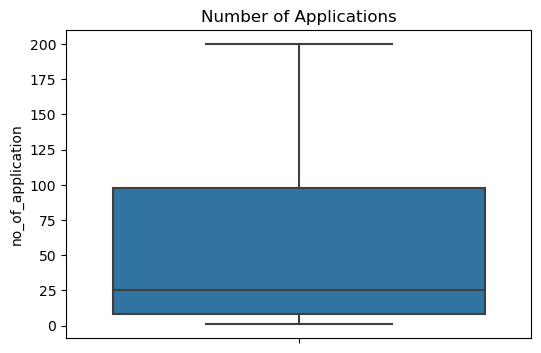

In [21]:
#Checking for the distribution of the number of application column
plt.figure(figsize=(6,4))
sns.boxplot(y = df.no_of_application, data=df.no_of_application)
plt.title("Number of Applications")
plt.show()

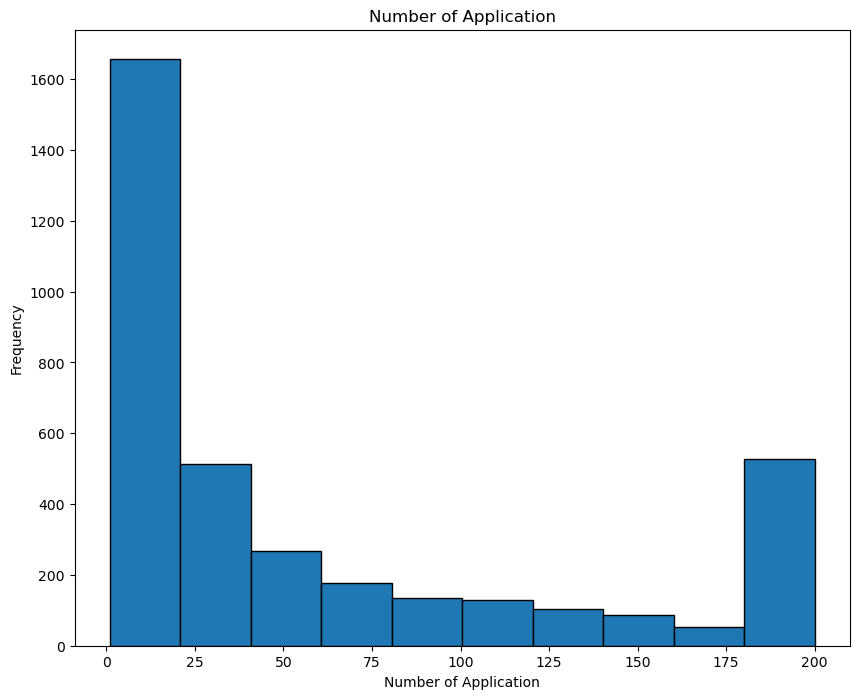

In [22]:
#Checking for the distribution of the number of application column
plt.figure(figsize=(10,8))
plt.hist(df.no_of_application, bottom=0, edgecolor='black')
plt.title("Number of Application")
plt.xlabel("Number of Application")
plt.ylabel("Frequency")
plt.show()

In [23]:
# replacing missing values in no_of_application column with the median
df["no_of_application"].fillna(df["no_of_application"].median(), inplace=True)

In [24]:
# Replace zeros with the median
df["no_of_application"] = df["no_of_application"].replace(0, df.no_of_application.median())

In [25]:
list(df['no_of_application'])

[200.0,
 184.0,
 200.0,
 200.0,
 8.0,
 200.0,
 200.0,
 2.0,
 7.0,
 25.0,
 22.0,
 111.0,
 36.0,
 44.0,
 29.0,
 4.0,
 19.0,
 14.0,
 13.0,
 2.0,
 8.0,
 32.0,
 20.0,
 25.0,
 14.0,
 2.0,
 5.0,
 21.0,
 27.0,
 85.0,
 25.0,
 2.0,
 20.0,
 8.0,
 97.0,
 2.0,
 42.0,
 3.0,
 1.0,
 1.0,
 5.0,
 130.0,
 127.0,
 27.0,
 25.0,
 11.0,
 16.0,
 11.0,
 27.0,
 25.0,
 60.0,
 17.0,
 2.0,
 3.0,
 11.0,
 11.0,
 25.0,
 52.0,
 25.0,
 5.0,
 3.0,
 25.0,
 2.0,
 4.0,
 2.0,
 50.0,
 200.0,
 7.0,
 200.0,
 7.0,
 4.0,
 32.0,
 10.0,
 61.0,
 95.0,
 39.0,
 18.0,
 6.0,
 40.0,
 2.0,
 138.0,
 9.0,
 26.0,
 3.0,
 2.0,
 26.0,
 9.0,
 8.0,
 17.0,
 17.0,
 78.0,
 47.0,
 8.0,
 104.0,
 22.0,
 6.0,
 15.0,
 110.0,
 18.0,
 25.0,
 18.0,
 8.0,
 17.0,
 52.0,
 38.0,
 122.0,
 25.0,
 8.0,
 3.0,
 34.0,
 149.0,
 3.0,
 2.0,
 18.0,
 200.0,
 27.0,
 9.0,
 9.0,
 83.0,
 5.0,
 10.0,
 57.0,
 66.0,
 5.0,
 2.0,
 25.0,
 1.0,
 25.0,
 9.0,
 5.0,
 1.0,
 1.0,
 10.0,
 25.0,
 3.0,
 4.0,
 1.0,
 11.0,
 56.0,
 15.0,
 3.0,
 17.0,
 2.0,
 80.0,
 135.0,
 17.0,
 200.0,
 15.0,

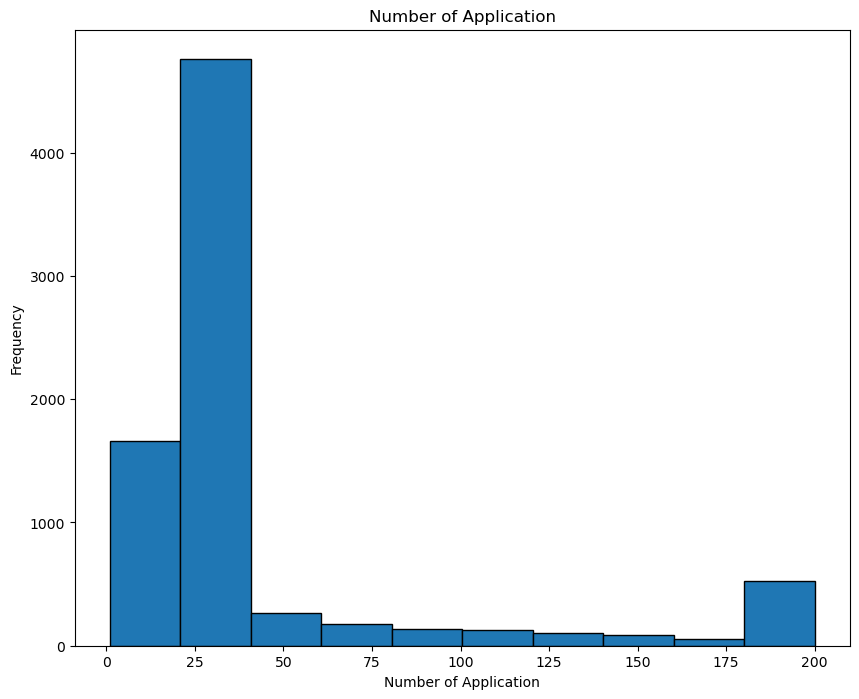

In [26]:
#Checking for the new distribution of the number of application column
plt.figure(figsize=(10,8))
plt.hist(df.no_of_application, bottom=0, edgecolor='black')
plt.title("Number of Application")
plt.xlabel("Number of Application")
plt.ylabel("Frequency")
plt.show()

In [27]:
#checking for the new mean,median and mode

print(f"Mean is {df.no_of_application.mean()}")
print(f"Median is {df.no_of_application.median()}")
print(f"Mode is {df.no_of_application.mode()}")

Mean is 41.35267291613884
Median is 25.0
Mode is 0    25.0
Name: no_of_application, dtype: float64


In [28]:
# Converting the column to integers
df['no_of_application'] = df['no_of_application'].astype(int)

df.head(2)

,job_ID,job,location,company_name,work_type,full_time_remote,no_of_employ,no_of_application,linkedin_followers
0,3471657636,"Data Analyst, Trilogy (Remote) - $60,000/year USD","Delhi, Delhi, India",Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",200,"5,395,547 followers"
1,3471669068,"Data Analyst, Trilogy (Remote) - $60,000/year USD","New Delhi, Delhi, India",Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",184,"5,395,547 followers"


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7894 entries, 0 to 7926
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_ID              7894 non-null   int64 
 1   job                 7894 non-null   object
 2   location            7894 non-null   object
 3   company_name        7892 non-null   object
 4   work_type           7736 non-null   object
 5   full_time_remote    7848 non-null   object
 6   no_of_employ        7603 non-null   object
 7   no_of_application   7894 non-null   int32 
 8   linkedin_followers  4814 non-null   object
dtypes: int32(1), int64(1), object(7)
memory usage: 843.9+ KB


## Cleaning "linkedin_followers" column

In [30]:
df.head(3)

,job_ID,job,location,company_name,work_type,full_time_remote,no_of_employ,no_of_application,linkedin_followers
0,3471657636,"Data Analyst, Trilogy (Remote) - $60,000/year USD","Delhi, Delhi, India",Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",200,"5,395,547 followers"
1,3471669068,"Data Analyst, Trilogy (Remote) - $60,000/year USD","New Delhi, Delhi, India",Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",184,"5,395,547 followers"
2,3474349934,Data Analyst - WFH,Greater Bengaluru Area,Uplers,Remote,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",200,NaN


In [31]:
#checking the structure of the linkedin_followers column
list(df.linkedin_followers)

['5,395,547 followers',
 '5,395,547 followers',
 nan,
 '2,094 followers',
 nan,
 '972,657 followers',
 '5,395,546 followers',
 '1,045 followers',
 '30,319 followers',
 '2,163 followers',
 '4,780 followers',
 '198,797 followers',
 nan,
 '269,349 followers',
 '6,311 followers',
 '99,201 followers',
 nan,
 '23,377 followers',
 '269,352 followers',
 '4,859 followers',
 '928 followers',
 nan,
 '24,909 followers',
 '29,076 followers',
 '11,917,555 followers',
 '917 followers',
 '5,168 followers',
 '331,816 followers',
 '4,581 followers',
 '2,492,017 followers',
 nan,
 '18,143 followers',
 nan,
 nan,
 nan,
 nan,
 '11,917,579 followers',
 'SHREWSBURY',
 nan,
 'SHREWSBURY',
 nan,
 '4,377 followers',
 nan,
 '331,817 followers',
 '1,172 followers',
 nan,
 '331,818 followers',
 '11,917,600 followers',
 '252,640 followers',
 '42 followers',
 '11,917,604 followers',
 '227,540 followers',
 nan,
 nan,
 nan,
 '11,917,607 followers',
 nan,
 nan,
 '6,255 followers',
 '5,446 followers',
 '30,619 followers

In [32]:
# Extracting numeric values and removing commas and "followers"
df["linkedin_followers"] = df["linkedin_followers"].str.replace(",", "").str.replace(" followers", "")

In [33]:
list(df.linkedin_followers)

['5395547',
 '5395547',
 nan,
 '2094',
 nan,
 '972657',
 '5395546',
 '1045',
 '30319',
 '2163',
 '4780',
 '198797',
 nan,
 '269349',
 '6311',
 '99201',
 nan,
 '23377',
 '269352',
 '4859',
 '928',
 nan,
 '24909',
 '29076',
 '11917555',
 '917',
 '5168',
 '331816',
 '4581',
 '2492017',
 nan,
 '18143',
 nan,
 nan,
 nan,
 nan,
 '11917579',
 'SHREWSBURY',
 nan,
 'SHREWSBURY',
 nan,
 '4377',
 nan,
 '331817',
 '1172',
 nan,
 '331818',
 '11917600',
 '252640',
 '42',
 '11917604',
 '227540',
 nan,
 nan,
 nan,
 '11917607',
 nan,
 nan,
 '6255',
 '5446',
 '30619',
 nan,
 '5748',
 '10980',
 '10879',
 nan,
 nan,
 '780908',
 '152614',
 '2375',
 nan,
 '11917646',
 '1267',
 '4523934',
 '11917645',
 '24434',
 '37230',
 '43437',
 nan,
 '2490',
 '739',
 '11917653',
 nan,
 '1781',
 '3000',
 '21235',
 '447743',
 nan,
 '6686',
 '10448',
 '401611',
 '36518',
 '2660',
 nan,
 nan,
 '72024',
 '7699',
 '20096',
 '11917681',
 nan,
 nan,
 '19775',
 nan,
 nan,
 nan,
 nan,
 '780925',
 '82064',
 nan,
 nan,
 '9378',
 '12

In [34]:
# Converting the 'num_of_linkedin_followers' column to numeric, and replacing strings with NaN
df["linkedin_followers"] = pd.to_numeric(df["linkedin_followers"], errors='coerce')

In [35]:
list(df.linkedin_followers)

[5395547.0,
 5395547.0,
 nan,
 2094.0,
 nan,
 972657.0,
 5395546.0,
 1045.0,
 30319.0,
 2163.0,
 4780.0,
 198797.0,
 nan,
 269349.0,
 6311.0,
 99201.0,
 nan,
 23377.0,
 269352.0,
 4859.0,
 928.0,
 nan,
 24909.0,
 29076.0,
 11917555.0,
 917.0,
 5168.0,
 331816.0,
 4581.0,
 2492017.0,
 nan,
 18143.0,
 nan,
 nan,
 nan,
 nan,
 11917579.0,
 nan,
 nan,
 nan,
 nan,
 4377.0,
 nan,
 331817.0,
 1172.0,
 nan,
 331818.0,
 11917600.0,
 252640.0,
 42.0,
 11917604.0,
 227540.0,
 nan,
 nan,
 nan,
 11917607.0,
 nan,
 nan,
 6255.0,
 5446.0,
 30619.0,
 nan,
 5748.0,
 10980.0,
 10879.0,
 nan,
 nan,
 780908.0,
 152614.0,
 2375.0,
 nan,
 11917646.0,
 1267.0,
 4523934.0,
 11917645.0,
 24434.0,
 37230.0,
 43437.0,
 nan,
 2490.0,
 739.0,
 11917653.0,
 nan,
 1781.0,
 3000.0,
 21235.0,
 447743.0,
 nan,
 6686.0,
 10448.0,
 401611.0,
 36518.0,
 2660.0,
 nan,
 nan,
 72024.0,
 7699.0,
 20096.0,
 11917681.0,
 nan,
 nan,
 19775.0,
 nan,
 nan,
 nan,
 nan,
 780925.0,
 82064.0,
 nan,
 nan,
 9378.0,
 12229.0,
 nan,
 4632.

In [36]:
#checking for mean,median and mode while excluding missing values

print(f"Mean is {df.linkedin_followers.mean()}")
print(f"Median is {df.linkedin_followers.median()}")
print(f"Mode is {df.linkedin_followers.mode()}")

Mean is 1110508.7046025104
Median is 36276.5
Mode is 0    449483.0
Name: linkedin_followers, dtype: float64


In [37]:
# replacing missing values in no_of_application column with the median
df['linkedin_followers'].fillna(df['linkedin_followers'].median(), inplace=True)

In [38]:
# Replace zeros with the median
df["linkedin_followers"] = df["linkedin_followers"].replace(0, df.linkedin_followers.median())

In [39]:
# Count the number of zeros in the linkedin_followers column_name
zero_counts = df["linkedin_followers"].value_counts().get(0, 0)

# Print the number of zeros
print(f"Number of zeros in the linkedin_followers column: {zero_counts}")

Number of zeros in the linkedin_followers column: 0


In [40]:
list(df.linkedin_followers)

[5395547.0,
 5395547.0,
 36276.5,
 2094.0,
 36276.5,
 972657.0,
 5395546.0,
 1045.0,
 30319.0,
 2163.0,
 4780.0,
 198797.0,
 36276.5,
 269349.0,
 6311.0,
 99201.0,
 36276.5,
 23377.0,
 269352.0,
 4859.0,
 928.0,
 36276.5,
 24909.0,
 29076.0,
 11917555.0,
 917.0,
 5168.0,
 331816.0,
 4581.0,
 2492017.0,
 36276.5,
 18143.0,
 36276.5,
 36276.5,
 36276.5,
 36276.5,
 11917579.0,
 36276.5,
 36276.5,
 36276.5,
 36276.5,
 4377.0,
 36276.5,
 331817.0,
 1172.0,
 36276.5,
 331818.0,
 11917600.0,
 252640.0,
 42.0,
 11917604.0,
 227540.0,
 36276.5,
 36276.5,
 36276.5,
 11917607.0,
 36276.5,
 36276.5,
 6255.0,
 5446.0,
 30619.0,
 36276.5,
 5748.0,
 10980.0,
 10879.0,
 36276.5,
 36276.5,
 780908.0,
 152614.0,
 2375.0,
 36276.5,
 11917646.0,
 1267.0,
 4523934.0,
 11917645.0,
 24434.0,
 37230.0,
 43437.0,
 36276.5,
 2490.0,
 739.0,
 11917653.0,
 36276.5,
 1781.0,
 3000.0,
 21235.0,
 447743.0,
 36276.5,
 6686.0,
 10448.0,
 401611.0,
 36518.0,
 2660.0,
 36276.5,
 36276.5,
 72024.0,
 7699.0,
 20096.0,
 11

In [41]:
# Converting the column to integers
df["linkedin_followers"] = df["linkedin_followers"].astype(int)

df.head(3)

,job_ID,job,location,company_name,work_type,full_time_remote,no_of_employ,no_of_application,linkedin_followers
0,3471657636,"Data Analyst, Trilogy (Remote) - $60,000/year USD","Delhi, Delhi, India",Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",200,5395547
1,3471669068,"Data Analyst, Trilogy (Remote) - $60,000/year USD","New Delhi, Delhi, India",Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",184,5395547
2,3474349934,Data Analyst - WFH,Greater Bengaluru Area,Uplers,Remote,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",200,36276


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7894 entries, 0 to 7926
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_ID              7894 non-null   int64 
 1   job                 7894 non-null   object
 2   location            7894 non-null   object
 3   company_name        7892 non-null   object
 4   work_type           7736 non-null   object
 5   full_time_remote    7848 non-null   object
 6   no_of_employ        7603 non-null   object
 7   no_of_application   7894 non-null   int32 
 8   linkedin_followers  7894 non-null   int32 
dtypes: int32(2), int64(1), object(6)
memory usage: 813.1+ KB


## Cleaning "job" column

In [43]:
df.head(3)

,job_ID,job,location,company_name,work_type,full_time_remote,no_of_employ,no_of_application,linkedin_followers
0,3471657636,"Data Analyst, Trilogy (Remote) - $60,000/year USD","Delhi, Delhi, India",Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",200,5395547
1,3471669068,"Data Analyst, Trilogy (Remote) - $60,000/year USD","New Delhi, Delhi, India",Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",184,5395547
2,3474349934,Data Analyst - WFH,Greater Bengaluru Area,Uplers,Remote,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",200,36276


In [44]:
list(df.job)

['Data Analyst, Trilogy (Remote) - $60,000/year USD',
 'Data Analyst, Trilogy (Remote) - $60,000/year USD',
 'Data Analyst - WFH',
 'Data Analyst',
 'Data Analyst',
 'Data Analyst',
 'Data Analyst, Trilogy (Remote) - $60,000/year USD',
 'Shopify Developer',
 'Database Developer',
 'Shopify Developer',
 'Shopify Developer',
 'Data Engineer',
 'Tableau (APL)',
 'Data Engineer (Python)',
 'Python Data Engineer',
 'Zoho Developer',
 'Salesforce CPQ Developer(Looking for only Immediate Joiners)',
 'Golang Developer',
 'SAP Customer Data Cloud "Business Analyst Technical"',
 'Quickbase Developer',
 'Vlocity Developer - (Freelancer)',
 'Data Engineer',
 'ODI Developer - Immediate Joiner',
 'Spotfire Developer',
 'Developer',
 'Smart Contract Developers(Experienced)',
 'STIBO Lead developers (Functional)',
 'Salesforce Developer Aura LWC',
 'Developer',
 'Salesforce Developer',
 'ssrs',
 'GCP Data Engineer',
 'Sr Data Analyst -Data Governance / Collibra',
 'Data Engineer - PySpark,Scala,EMR,Ai

In [45]:
# Removing anything that comes after a comma "-" and opening parenthesis "("
df["job"] = df["job"].str.split("[,(]").str[0]

In [46]:
# Removing extra whitespaces
df["job"] = df["job"].str.strip()

In [47]:
# Removing certain words from job names
df["job"] = df["job"].str.replace(r'\b(Senior|Junior|Associate|Sr.|Jr.|Sr|Jr|Fulltime|WFH)\b', '', regex=True, case=False)

In [48]:
list(df.job)

['Data Analyst',
 'Data Analyst',
 'Data Analyst - ',
 'Data Analyst',
 'Data Analyst',
 'Data Analyst',
 'Data Analyst',
 'Shopify Developer',
 'Database Developer',
 'Shopify Developer',
 'Shopify Developer',
 'Data Engineer',
 'Tableau',
 'Data Engineer',
 'Python Data Engineer',
 'Zoho Developer',
 'Salesforce CPQ Developer',
 'Golang Developer',
 'SAP Customer Data Cloud "Business Analyst Technical"',
 'Quickbase Developer',
 'Vlocity Developer -',
 'Data Engineer',
 'ODI Developer - Immediate Joiner',
 'Spotfire Developer',
 'Developer',
 'Smart Contract Developers',
 'STIBO Lead developers',
 'Salesforce Developer Aura LWC',
 'Developer',
 'Salesforce Developer',
 'ssrs',
 'GCP Data Engineer',
 'Data Analyst -Data Governance / Collibra',
 'Data Engineer - PySpark',
 'Data Engineer',
 'Developer',
 'AWS Data Engineer',
 'Azure Data Engineer',
 'SAS Developer',
 'Azure Pyspark',
 'Filenet developer',
 'Salesforce Developer',
 'Salesforce Developer',
 'Salesforce Developer',
 'TIBC

## Cleaning "job location" column

In [49]:
df.head(3)

,job_ID,job,location,company_name,work_type,full_time_remote,no_of_employ,no_of_application,linkedin_followers
0,3471657636,Data Analyst,"Delhi, Delhi, India",Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",200,5395547
1,3471669068,Data Analyst,"New Delhi, Delhi, India",Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",184,5395547
2,3474349934,Data Analyst -,Greater Bengaluru Area,Uplers,Remote,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",200,36276


In [50]:
list(df.location)

['Delhi, Delhi, India',
 'New Delhi, Delhi, India',
 'Greater Bengaluru Area',
 'Gurugram, Haryana, India',
 'Mohali district, Punjab, India',
 'Gurugram, Haryana, India',
 'Bengaluru, Karnataka, India',
 'Delhi, India',
 'Gurugram, Haryana, India',
 'Gurugram, Haryana, India',
 'Noida, Uttar Pradesh, India',
 'Gurugram, Haryana, India',
 'Noida, Uttar Pradesh, India',
 'Gurugram, Haryana, India',
 'Hyderabad, Telangana, India',
 'India',
 'Hyderabad, Telangana, India',
 'Delhi, India',
 'Bengaluru, Karnataka, India',
 'Hyderabad, Telangana, India',
 'India',
 'Bengaluru, Karnataka, India',
 'Chennai, Tamil Nadu, India',
 'Bengaluru, Karnataka, India',
 'Kolkata, West Bengal, India',
 'Madurai, Tamil Nadu, India',
 'Bengaluru, Karnataka, India',
 'India',
 'Pune, Maharashtra, India',
 'Gurugram, Haryana, India',
 'Mumbai, Maharashtra, India',
 'Hyderabad, Telangana, India',
 'India',
 'Bengaluru, Karnataka, India',
 'Hyderabad, Telangana, India',
 'Pune, Maharashtra, India',
 'Delhi, I

In [51]:
# Removing anything that comes after the first comma
df["location"] = df["location"].str.split(',').str[0]

In [52]:
list(df.location)

['Delhi',
 'New Delhi',
 'Greater Bengaluru Area',
 'Gurugram',
 'Mohali district',
 'Gurugram',
 'Bengaluru',
 'Delhi',
 'Gurugram',
 'Gurugram',
 'Noida',
 'Gurugram',
 'Noida',
 'Gurugram',
 'Hyderabad',
 'India',
 'Hyderabad',
 'Delhi',
 'Bengaluru',
 'Hyderabad',
 'India',
 'Bengaluru',
 'Chennai',
 'Bengaluru',
 'Kolkata',
 'Madurai',
 'Bengaluru',
 'India',
 'Pune',
 'Gurugram',
 'Mumbai',
 'Hyderabad',
 'India',
 'Bengaluru',
 'Hyderabad',
 'Pune',
 'Delhi',
 'Mumbai',
 'Bengaluru',
 'Greater Bengaluru Area',
 'Greater Bengaluru Area',
 'Pune',
 'India',
 'India',
 'India',
 'Bengaluru',
 'Bengaluru',
 'Chennai',
 'Greater Bengaluru Area',
 'Kochi',
 'Kolkata',
 'Pune',
 'Hyderabad',
 'Noida',
 'Pune',
 'Bengaluru',
 'Pune',
 'Greater Bengaluru Area',
 'Pune',
 'Hyderabad',
 'Mumbai',
 'Visakhapatnam',
 'Pune',
 'Pune',
 'Chennai',
 'Mumbai',
 'Bengaluru',
 'Bengaluru',
 'India',
 'Bengaluru',
 'Hyderabad',
 'Hyderabad',
 'Ahmedabad',
 'Chennai',
 'Bengaluru',
 'India',
 'Hyder

In [53]:
#finding the most occuring city
print(f"Mode is {df.location.mode()}")

Mode is 0    Bengaluru
Name: location, dtype: object


In [54]:
#replacing India with Unknown City

df["location"] = df["location"].replace('India', 'Unknown City')

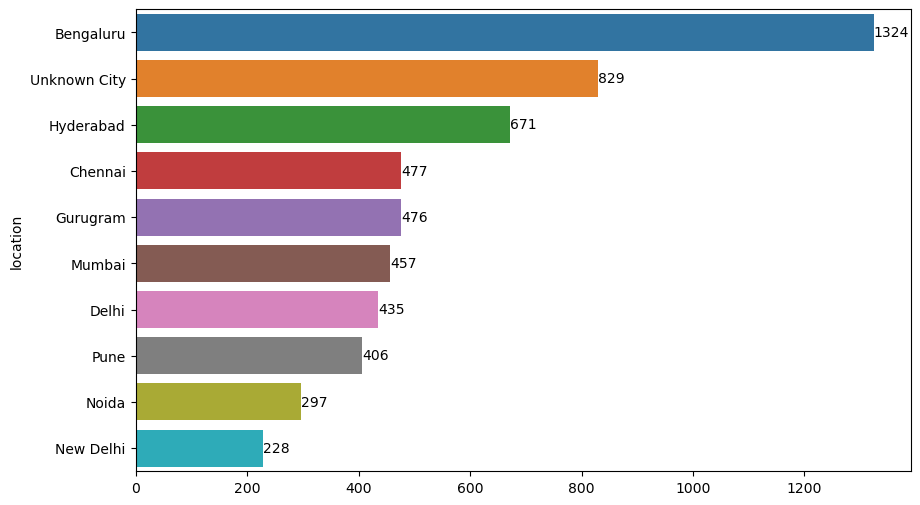

In [55]:
# Counting the occurrences of each city
city_counts = df["location"].value_counts()

# top ten cities
top_ten_cities = city_counts.head(10)

plt.figure(figsize=(10, 6))
bars = sns.barplot(x=top_ten_cities.values, y=top_ten_cities.index)

# Add data labels on top of each bar
for bar, label in zip(bars.patches, top_ten_cities.values):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{label}', 
             va='center', ha='left', fontsize=10, color='black')

plt.show()

## Cleaning "work type" column

In [56]:
df.head(3)

,job_ID,job,location,company_name,work_type,full_time_remote,no_of_employ,no_of_application,linkedin_followers
0,3471657636,Data Analyst,Delhi,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",200,5395547
1,3471669068,Data Analyst,New Delhi,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",184,5395547
2,3474349934,Data Analyst -,Greater Bengaluru Area,Uplers,Remote,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",200,36276


In [57]:
list(df.work_type)

['Remote',
 'Remote',
 'Remote',
 'On-site',
 'On-site',
 'On-site',
 'Remote',
 'On-site',
 'Hybrid',
 'Hybrid',
 'Remote',
 'On-site',
 nan,
 'On-site',
 'Remote',
 'Remote',
 'Remote',
 'Remote',
 'On-site',
 'On-site',
 'Remote',
 'Hybrid',
 'Hybrid',
 'On-site',
 'On-site',
 'On-site',
 'On-site',
 'Remote',
 'Remote',
 'On-site',
 'On-site',
 'On-site',
 'Remote',
 'Hybrid',
 'On-site',
 'On-site',
 'On-site',
 'On-site',
 'On-site',
 'On-site',
 'Hybrid',
 'Hybrid',
 'Remote',
 'Remote',
 'Remote',
 'On-site',
 'Hybrid',
 'On-site',
 'On-site',
 nan,
 'Hybrid',
 'Hybrid',
 'Remote',
 'On-site',
 'Hybrid',
 'Hybrid',
 'On-site',
 'Hybrid',
 'On-site',
 'On-site',
 'On-site',
 'Hybrid',
 'Hybrid',
 'On-site',
 'On-site',
 'On-site',
 'Hybrid',
 'On-site',
 'Remote',
 'Remote',
 'Hybrid',
 'On-site',
 'On-site',
 'Hybrid',
 'On-site',
 'Remote',
 'Hybrid',
 'Hybrid',
 'On-site',
 'On-site',
 'On-site',
 'Hybrid',
 'Hybrid',
 'Hybrid',
 'On-site',
 'Hybrid',
 'Remote',
 'Remote',
 '

In [58]:
# replacing missing values in work_type column with Not Specified
df["work_type"].fillna("Not Specified", inplace=True)

In [59]:
list(df.work_type)

['Remote',
 'Remote',
 'Remote',
 'On-site',
 'On-site',
 'On-site',
 'Remote',
 'On-site',
 'Hybrid',
 'Hybrid',
 'Remote',
 'On-site',
 'Not Specified',
 'On-site',
 'Remote',
 'Remote',
 'Remote',
 'Remote',
 'On-site',
 'On-site',
 'Remote',
 'Hybrid',
 'Hybrid',
 'On-site',
 'On-site',
 'On-site',
 'On-site',
 'Remote',
 'Remote',
 'On-site',
 'On-site',
 'On-site',
 'Remote',
 'Hybrid',
 'On-site',
 'On-site',
 'On-site',
 'On-site',
 'On-site',
 'On-site',
 'Hybrid',
 'Hybrid',
 'Remote',
 'Remote',
 'Remote',
 'On-site',
 'Hybrid',
 'On-site',
 'On-site',
 'Not Specified',
 'Hybrid',
 'Hybrid',
 'Remote',
 'On-site',
 'Hybrid',
 'Hybrid',
 'On-site',
 'Hybrid',
 'On-site',
 'On-site',
 'On-site',
 'Hybrid',
 'Hybrid',
 'On-site',
 'On-site',
 'On-site',
 'Hybrid',
 'On-site',
 'Remote',
 'Remote',
 'Hybrid',
 'On-site',
 'On-site',
 'Hybrid',
 'On-site',
 'Remote',
 'Hybrid',
 'Hybrid',
 'On-site',
 'On-site',
 'On-site',
 'Hybrid',
 'Hybrid',
 'Hybrid',
 'On-site',
 'Hybrid',


In [60]:
list(df.work_type)

['Remote',
 'Remote',
 'Remote',
 'On-site',
 'On-site',
 'On-site',
 'Remote',
 'On-site',
 'Hybrid',
 'Hybrid',
 'Remote',
 'On-site',
 'Not Specified',
 'On-site',
 'Remote',
 'Remote',
 'Remote',
 'Remote',
 'On-site',
 'On-site',
 'Remote',
 'Hybrid',
 'Hybrid',
 'On-site',
 'On-site',
 'On-site',
 'On-site',
 'Remote',
 'Remote',
 'On-site',
 'On-site',
 'On-site',
 'Remote',
 'Hybrid',
 'On-site',
 'On-site',
 'On-site',
 'On-site',
 'On-site',
 'On-site',
 'Hybrid',
 'Hybrid',
 'Remote',
 'Remote',
 'Remote',
 'On-site',
 'Hybrid',
 'On-site',
 'On-site',
 'Not Specified',
 'Hybrid',
 'Hybrid',
 'Remote',
 'On-site',
 'Hybrid',
 'Hybrid',
 'On-site',
 'Hybrid',
 'On-site',
 'On-site',
 'On-site',
 'Hybrid',
 'Hybrid',
 'On-site',
 'On-site',
 'On-site',
 'Hybrid',
 'On-site',
 'Remote',
 'Remote',
 'Hybrid',
 'On-site',
 'On-site',
 'Hybrid',
 'On-site',
 'Remote',
 'Hybrid',
 'Hybrid',
 'On-site',
 'On-site',
 'On-site',
 'Hybrid',
 'Hybrid',
 'Hybrid',
 'On-site',
 'Hybrid',


## Cleaning "full_time_remote" column

In [61]:
df.head(3)

,job_ID,job,location,company_name,work_type,full_time_remote,no_of_employ,no_of_application,linkedin_followers
0,3471657636,Data Analyst,Delhi,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",200,5395547
1,3471669068,Data Analyst,New Delhi,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",184,5395547
2,3474349934,Data Analyst -,Greater Bengaluru Area,Uplers,Remote,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",200,36276


In [62]:
list(df.full_time_remote)

['Full-time · Associate',
 'Full-time · Associate',
 'Full-time · Mid-Senior level',
 'Full-time',
 'Full-time',
 'Full-time · Entry level',
 'Full-time · Associate',
 'Full-time',
 'Full-time',
 nan,
 'Full-time',
 'Full-time · Mid-Senior level',
 'Full-time',
 'Full-time',
 'Full-time',
 'Contract',
 'Full-time · Mid-Senior level',
 'Full-time',
 'Full-time',
 'Full-time',
 'Contract',
 'Full-time',
 'Full-time',
 'Full-time',
 'Full-time · Mid-Senior level',
 'Full-time',
 'Full-time · Mid-Senior level',
 'Contract · Associate',
 'Full-time',
 'Full-time · Mid-Senior level',
 'Full-time',
 'Full-time',
 'Full-time · Mid-Senior level',
 'Full-time',
 'Full-time · Associate',
 'Full-time',
 'Full-time · Mid-Senior level',
 'Full-time',
 'Full-time · Associate',
 'Full-time',
 'Full-time · Mid-Senior level',
 'Full-time · Mid-Senior level',
 'Full-time · Mid-Senior level',
 'Contract · Associate',
 'Full-time',
 'Full-time',
 'Contract · Mid-Senior level',
 'Full-time · Mid-Senior leve

In [63]:
# replacing missing values in full_time_remote column with Not Specified
df["full_time_remote"].fillna("Not Specified", inplace=True)

In [64]:
list(df.full_time_remote)

['Full-time · Associate',
 'Full-time · Associate',
 'Full-time · Mid-Senior level',
 'Full-time',
 'Full-time',
 'Full-time · Entry level',
 'Full-time · Associate',
 'Full-time',
 'Full-time',
 'Not Specified',
 'Full-time',
 'Full-time · Mid-Senior level',
 'Full-time',
 'Full-time',
 'Full-time',
 'Contract',
 'Full-time · Mid-Senior level',
 'Full-time',
 'Full-time',
 'Full-time',
 'Contract',
 'Full-time',
 'Full-time',
 'Full-time',
 'Full-time · Mid-Senior level',
 'Full-time',
 'Full-time · Mid-Senior level',
 'Contract · Associate',
 'Full-time',
 'Full-time · Mid-Senior level',
 'Full-time',
 'Full-time',
 'Full-time · Mid-Senior level',
 'Full-time',
 'Full-time · Associate',
 'Full-time',
 'Full-time · Mid-Senior level',
 'Full-time',
 'Full-time · Associate',
 'Full-time',
 'Full-time · Mid-Senior level',
 'Full-time · Mid-Senior level',
 'Full-time · Mid-Senior level',
 'Contract · Associate',
 'Full-time',
 'Full-time',
 'Contract · Mid-Senior level',
 'Full-time · Mid

In [65]:
# Split the 'full_time_remote' column based on the first space and renaming new columns
df[["employment_type", "job_level"]] = df["full_time_remote"].apply(lambda x: pd.Series(str(x).split("·", 1)))

df.head(3)

,job_ID,job,location,company_name,work_type,full_time_remote,no_of_employ,no_of_application,linkedin_followers,employment_type,job_level
0,3471657636,Data Analyst,Delhi,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",200,5395547,Full-time,Associate
1,3471669068,Data Analyst,New Delhi,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",184,5395547,Full-time,Associate
2,3474349934,Data Analyst -,Greater Bengaluru Area,Uplers,Remote,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",200,36276,Full-time,Mid-Senior level


In [66]:
# Remove the columns from their current positions
employment_type_col = df.pop("employment_type")
job_level_col = df.pop("job_level")

# Insert the columns after the 'full_time_remote' column
df.insert(df.columns.get_loc("full_time_remote") + 1, "employment_type", employment_type_col)
df.insert(df.columns.get_loc("full_time_remote") + 2, "job_level", job_level_col)
df.head(3)

,job_ID,job,location,company_name,work_type,full_time_remote,employment_type,job_level,no_of_employ,no_of_application,linkedin_followers
0,3471657636,Data Analyst,Delhi,Crossover,Remote,Full-time · Associate,Full-time,Associate,"1,001-5,000 employees · IT Services and IT Con...",200,5395547
1,3471669068,Data Analyst,New Delhi,Crossover,Remote,Full-time · Associate,Full-time,Associate,"1,001-5,000 employees · IT Services and IT Con...",184,5395547
2,3474349934,Data Analyst -,Greater Bengaluru Area,Uplers,Remote,Full-time · Mid-Senior level,Full-time,Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",200,36276


## Cleaning "no_of_employ" column

In [67]:
df.head(3)

,job_ID,job,location,company_name,work_type,full_time_remote,employment_type,job_level,no_of_employ,no_of_application,linkedin_followers
0,3471657636,Data Analyst,Delhi,Crossover,Remote,Full-time · Associate,Full-time,Associate,"1,001-5,000 employees · IT Services and IT Con...",200,5395547
1,3471669068,Data Analyst,New Delhi,Crossover,Remote,Full-time · Associate,Full-time,Associate,"1,001-5,000 employees · IT Services and IT Con...",184,5395547
2,3474349934,Data Analyst -,Greater Bengaluru Area,Uplers,Remote,Full-time · Mid-Senior level,Full-time,Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",200,36276


In [68]:
list(df.no_of_employ)

['1,001-5,000 employees · IT Services and IT Consulting',
 '1,001-5,000 employees · IT Services and IT Consulting',
 '1,001-5,000 employees · IT Services and IT Consulting',
 '1-10 employees',
 '1-10 employees',
 '10,001+ employees · Telecommunications',
 '1,001-5,000 employees · IT Services and IT Consulting',
 '51-200 employees',
 '201-500 employees',
 nan,
 '11-50 employees',
 '501-1,000 employees · Renewable Energy Semiconductor Manufacturing',
 '501-1,000 employees · Market Research',
 '1,001-5,000 employees',
 '11-50 employees',
 '201-500 employees',
 '5,001-10,000 employees · IT Services and IT Consulting',
 '201-500 employees',
 '1,001-5,000 employees',
 '51-200 employees',
 '51-200 employees',
 '1-10 employees',
 '11-50 employees',
 '1,001-5,000 employees',
 '10,001+ employees · IT Services and IT Consulting',
 '51-200 employees',
 '51-200 employees · IT Services and IT Consulting',
 '51-200 employees · Technology, Information and Internet',
 '11-50 employees',
 '10,001+ emplo

In [69]:
# Removing anything that comes after "·"
df["no_of_employ"] = df["no_of_employ"].str.split('·').str[0]

In [70]:
list(df.no_of_employ)

['1,001-5,000 employees ',
 '1,001-5,000 employees ',
 '1,001-5,000 employees ',
 '1-10 employees',
 '1-10 employees',
 '10,001+ employees ',
 '1,001-5,000 employees ',
 '51-200 employees',
 '201-500 employees',
 nan,
 '11-50 employees',
 '501-1,000 employees ',
 '501-1,000 employees ',
 '1,001-5,000 employees',
 '11-50 employees',
 '201-500 employees',
 '5,001-10,000 employees ',
 '201-500 employees',
 '1,001-5,000 employees',
 '51-200 employees',
 '51-200 employees',
 '1-10 employees',
 '11-50 employees',
 '1,001-5,000 employees',
 '10,001+ employees ',
 '51-200 employees',
 '51-200 employees ',
 '51-200 employees ',
 '11-50 employees',
 '10,001+ employees ',
 '51-200 employees',
 '11-50 employees',
 nan,
 nan,
 '51-200 employees ',
 '501-1,000 employees',
 '10,001+ employees ',
 nan,
 '1,001-5,000 employees ',
 nan,
 '10,001+ employees ',
 '11-50 employees ',
 '5,001-10,000 employees ',
 '51-200 employees ',
 '11-50 employees',
 '51-200 employees',
 '51-200 employees ',
 '10,001+ em

In [71]:
# Removing 'employees' from the 'no_of_employ' column
df["no_of_employ"] = df["no_of_employ"].str.replace('employees', '')

In [108]:
# Removing any extra space from the 'no_of_employ' column
df["no_of_employ"] = df["no_of_employ"].str.replace(' ', '')

In [109]:
# Removing extra whitespaces
df["df.no_of_employ"] = df["no_of_employ"].str.strip()

In [110]:
list(df.no_of_employ)

['1,001-5,000',
 '1,001-5,000',
 '1,001-5,000',
 '1-10',
 '1-10',
 '10,001+',
 '1,001-5,000',
 '51-200',
 '201-500',
 nan,
 '11-50',
 '501-1,000',
 '501-1,000',
 '1,001-5,000',
 '11-50',
 '201-500',
 '5,001-10,000',
 '201-500',
 '1,001-5,000',
 '51-200',
 '51-200',
 '1-10',
 '11-50',
 '1,001-5,000',
 '10,001+',
 '51-200',
 '51-200',
 '51-200',
 '11-50',
 '10,001+',
 '51-200',
 '11-50',
 nan,
 nan,
 '51-200',
 '501-1,000',
 '10,001+',
 nan,
 '1,001-5,000',
 nan,
 '10,001+',
 '11-50',
 '5,001-10,000',
 '51-200',
 '11-50',
 '51-200',
 '51-200',
 '10,001+',
 '501-1,000',
 '51-200',
 '10,001+',
 nan,
 nan,
 '1,001-5,000',
 '10,001+',
 '10,001+',
 '501-1,000',
 '10,001+',
 '11-50',
 '11-50',
 '1-10',
 nan,
 '1-10',
 '11-50',
 '11-50',
 '501-1,000',
 '10,001+',
 '10,001+',
 '201-500',
 '51-200',
 '1,001-5,000',
 '10,001+',
 '51-200',
 '10,001+',
 '10,001+',
 '11-50',
 '501-1,000',
 '201-500',
 '10,001+',
 '1-10',
 '51-200',
 '10,001+',
 '10,001+',
 '11-50',
 '51-200',
 '201-500',
 '1,001-5,00

In [111]:
# Converting the column to category type
df["no_of_employ"] = df["no_of_employ"].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7894 entries, 0 to 7926
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   job_ID              7894 non-null   int64   
 1   job                 7894 non-null   object  
 2   location            7894 non-null   object  
 3   company_name        7892 non-null   object  
 4   work_type           7894 non-null   object  
 5   full_time_remote    7894 non-null   object  
 6   employment_type     7894 non-null   object  
 7   job_level           4843 non-null   object  
 8   no_of_employ        7603 non-null   category
 9   no_of_application   7894 non-null   int32   
 10  linkedin_followers  7894 non-null   int32   
 11  df.no_of_employ     7603 non-null   object  
dtypes: category(1), int32(2), int64(1), object(8)
memory usage: 944.5+ KB


In [112]:
unique_no_of_employ = df["no_of_employ"].unique()
list(unique_no_of_employ)

['1,001-5,000',
 '1-10',
 '10,001+',
 '51-200',
 '201-500',
 nan,
 '11-50',
 '501-1,000',
 '5,001-10,000']

In [113]:
df.head()

,job_ID,job,location,company_name,work_type,full_time_remote,employment_type,job_level,no_of_employ,no_of_application,linkedin_followers,df.no_of_employ
0,3471657636,Data Analyst,Delhi,Crossover,Remote,Full-time · Associate,Full-time,Associate,"1,001-5,000",200,5395547,"1,001-5,000"
1,3471669068,Data Analyst,New Delhi,Crossover,Remote,Full-time · Associate,Full-time,Associate,"1,001-5,000",184,5395547,"1,001-5,000"
2,3474349934,Data Analyst -,Greater Bengaluru Area,Uplers,Remote,Full-time · Mid-Senior level,Full-time,Mid-Senior level,"1,001-5,000",200,36276,"1,001-5,000"
3,3472816027,Data Analyst,Gurugram,PVAR SERVICES,On-site,Full-time,Full-time,NaN,1-10,200,2094,1-10
4,3473311511,Data Analyst,Mohali district,Timeline Freight Brokers,On-site,Full-time,Full-time,NaN,1-10,8,36276,1-10


# Answering The Business Questions

### 1. Which companies attract the highest number of applications?

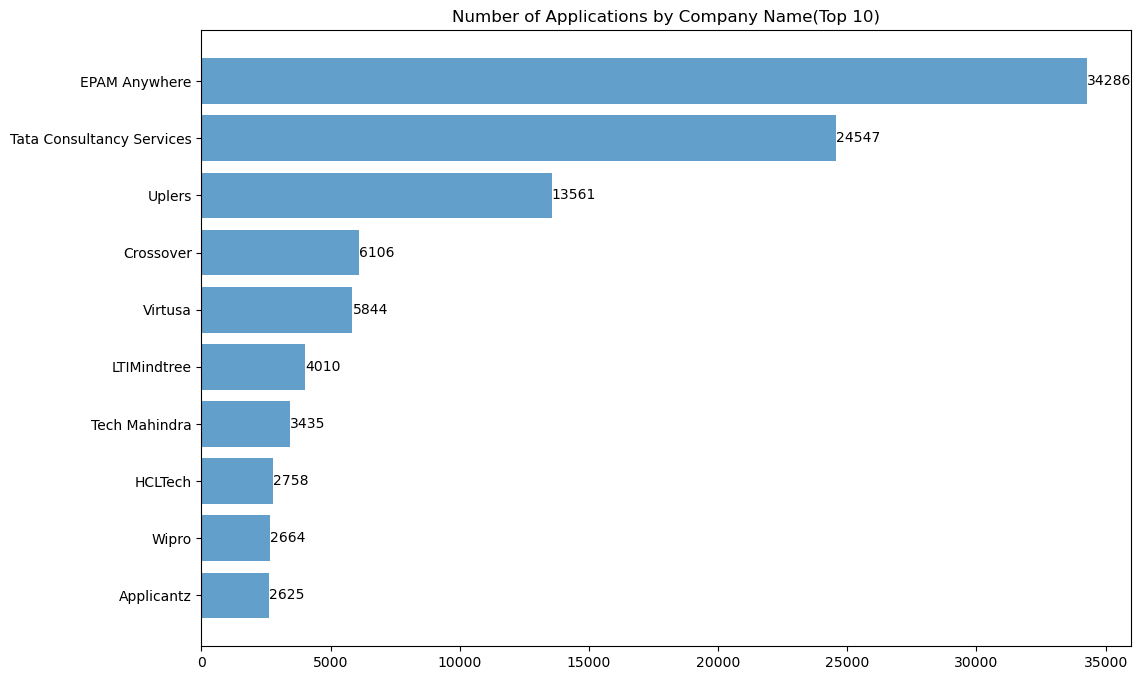

In [159]:
#Grouping by job title and summing their corresponding number of applications
top_companies = df.groupby("company_name")["no_of_application"].sum().sort_values(ascending=False)

#selecting the topten jobs with the highest number of applications
top_ten_companies = top_companies.head(10)

#plotting ehorizontal bar chart
plt.figure(figsize=(12,8))
bars = plt.barh(top_ten_companies.index[::-1], top_ten_companies.values[::-1], alpha=0.7)

#adding data labels
for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2, str(int(bar.get_width())), ha="left", va="center")

plt.title("Number of Applications by Company Name(Top 10)")
plt.show()

EPAM Anywhere, TATA Consultancy Services and UPLERS are the top 3 companies with the highest number of applications.

### 2. Which job levels receive the highest number of applications?

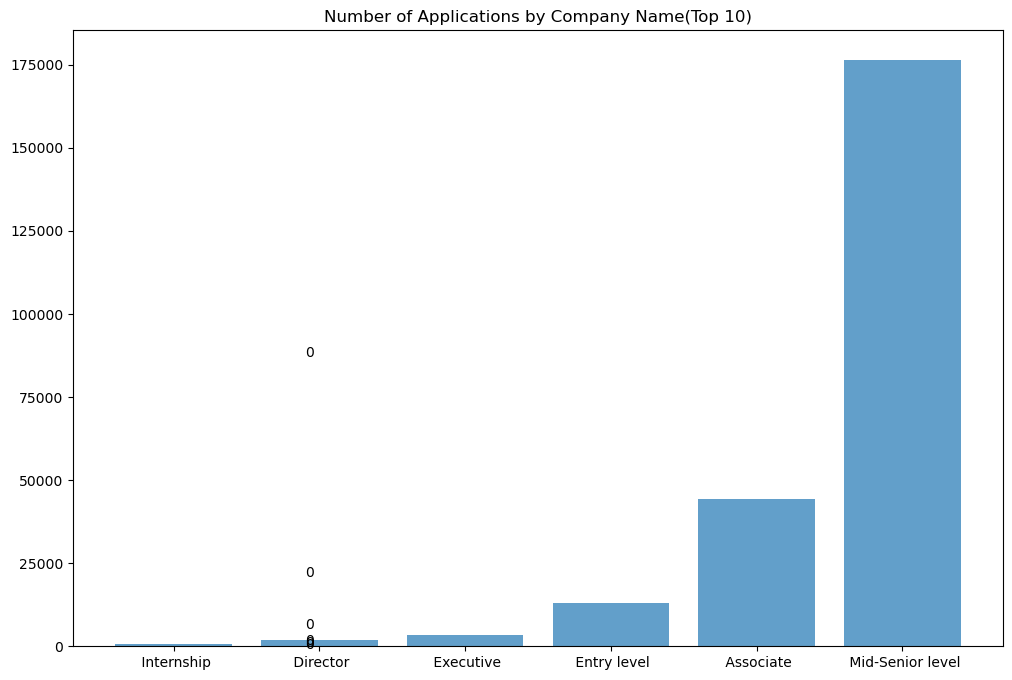

In [165]:
#Grouping by job levels and summing their corresponding number of applications
top_companies = df.groupby("job_level")["no_of_application"].sum().sort_values(ascending=False)


#plotting a horizontal bar chart
plt.figure(figsize=(12,8))
bars = plt.bar(top_companies.index[::-1], top_companies.values[::-1], alpha=0.7)

#adding data labels
for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2,
             f"{int(bar.get_width()):,}", ha="left", va="center")

plt.title("Number of Applications by Company Name(Top 10)")
plt.show()

Mid-senior level positions received the highest number of applcations.

### 3. Are there specific job titles that receive significantly more applications?

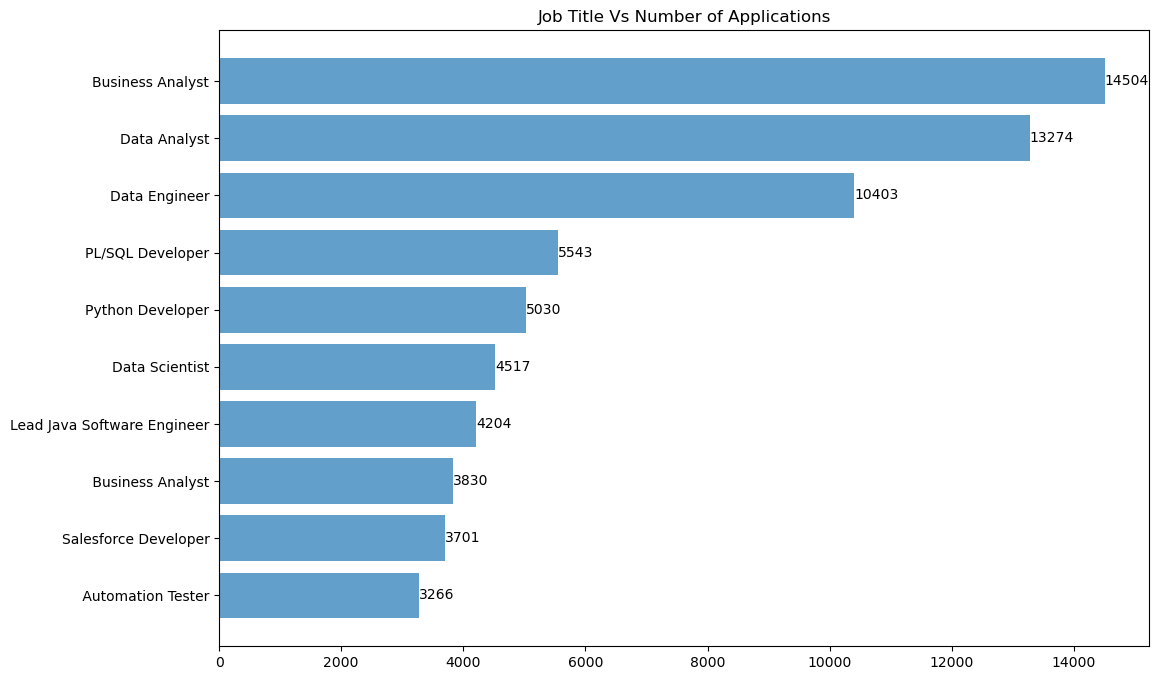

In [143]:
#Grouping by job title and summing their corresponding number of applications
top_jobs = df.groupby("job")["no_of_application"].sum().sort_values(ascending=False)

#selecting the topten jobs with the highest number of applications
top_ten_jobs = top_jobs.head(10)

#plotting ehorizontal bar chart
plt.figure(figsize=(12,8))
bars = plt.barh(top_ten_jobs.index[::-1], top_ten_jobs.values[::-1], alpha=0.7)

#adding data labels
for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2, str(int(bar.get_width())), ha="left", va="center")

plt.title("Job Title Vs Number of Applications")
plt.show()

Business Analyst, Data Analyst and Data Engineer jobs receved the most applications.

### 4. How does the company's follower count on LinkedIn correlate with the number of applications?


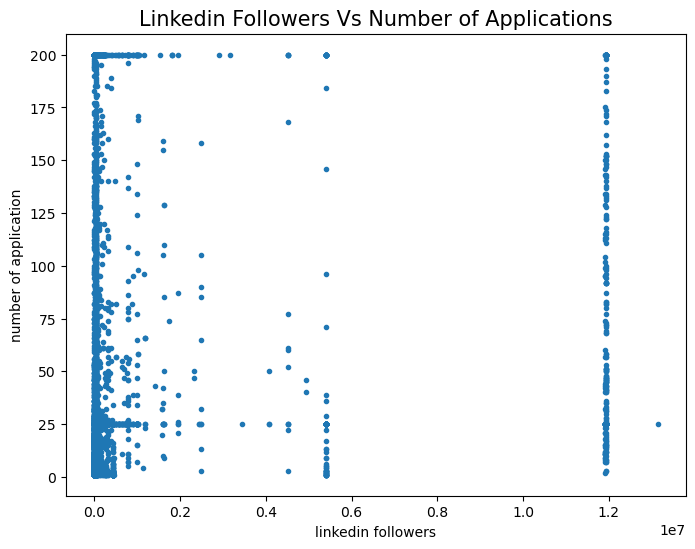

In [123]:
fig,ax= plt.subplots(figsize=(8,6))
ax.scatter(df["linkedin_followers"],
           df["no_of_application"],
           marker= '.')
ax.set_xlabel("linkedin followers")
ax.set_ylabel("number of application")
ax.set_title("Linkedin Followers Vs Number of Applications",fontsize= 15)
plt.show()

There exist no direct relationship beyween acompay's linkedin followers and number of applications received

### 5. Is there a relationship between the size of the company and the number of applications?

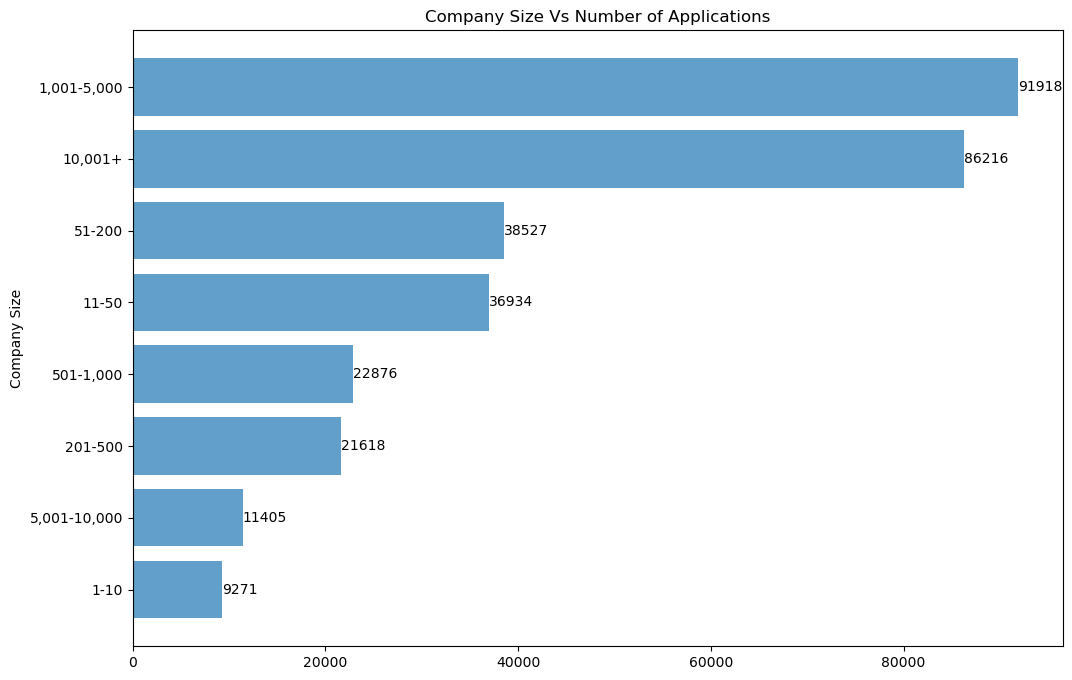

In [144]:
#Grouping by companysize/number of employees and summing their corresponding number of applications
company_size_counts = df.groupby("no_of_employ")["no_of_application"].sum().sort_values(ascending=True)

#plotting a horizontal bar chart
plt.figure(figsize=(12,8))
bars = plt.barh(company_size_counts.index, company_size_counts.values, alpha=0.7)

for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2, str(int(bar.get_width())), ha="left", va="center")

plt.title("Company Size Vs Number of Applications")
plt.ylabel("Company Size")
plt.show()

The chart reveals that not all large companies receive high applications.